In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sc
import seaborn as sns

from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
Train = pd.read_csv('../Data/input/train.csv')
Test = pd.read_csv('../Data/input/test.csv')

print('Train size:{}'.format(Train.shape))
print('Test size:{}'.format(Test.shape))

Train size:(1460, 81)
Test size:(1459, 80)


# Educational Data analysis

In [3]:
Train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# На мой взгялд самые важные признаки 
#OverallQual
#YearBuilt
#TotalBsmtSF
#GrLivArea

## Посмотрим на целевую переменную SalePrice:

In [5]:
Train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

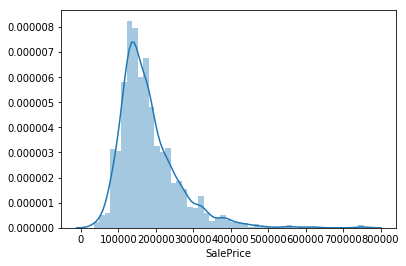

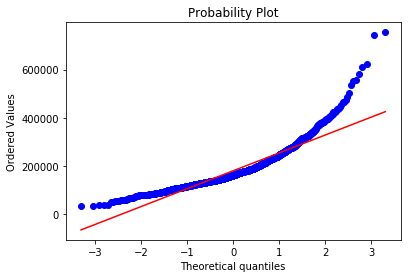

In [6]:
sns.distplot(Train['SalePrice']);


fig = plt.figure()
res = sc.stats.probplot(Train['SalePrice'], plot=plt)
plt.show()

In [7]:
print("Skewness: %f" % Train['SalePrice'].skew())
print("Kurtosis: %f" % Train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [8]:
sc.stats.shapiro(Train['SalePrice'])

(0.869671642780304, 3.206247534576162e-33)

In [9]:
# распределение не нормальное, log transformation

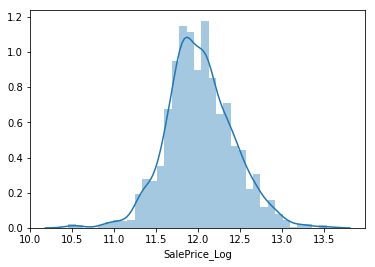

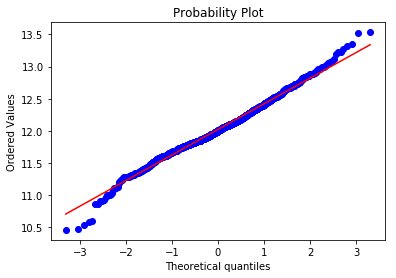

In [10]:
Train['SalePrice_Log'] = np.log(Train['SalePrice'])

sns.distplot(Train.SalePrice_Log)
fig = plt.figure()
res = sc.stats.probplot(Train['SalePrice_Log'], plot=plt)
plt.show()

In [11]:
Y_Log_Train = Train['SalePrice_Log'] 
Train.drop(['SalePrice_Log'],axis=1,inplace=True)

In [12]:
# Посмотрим на диаграмму рассеивания колличественных признаков

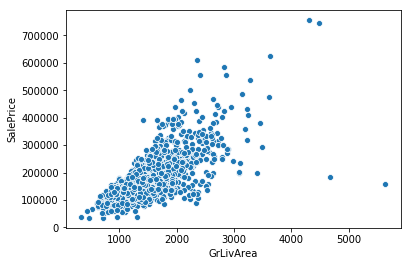

In [13]:
sns.scatterplot(Train.GrLivArea, Train.SalePrice);

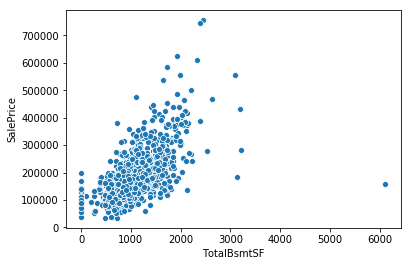

In [15]:
sns.scatterplot(Train.TotalBsmtSF, Train.SalePrice);

In [16]:
# Теперь перейдем к категориальным

In [17]:
# Посмотри на ящик с усами для OverallQual

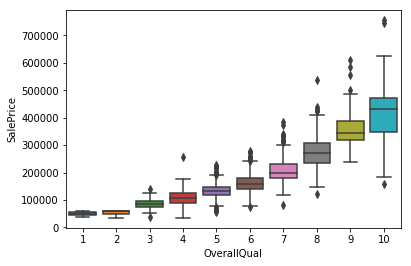

In [18]:
sns.boxplot(Train.OverallQual, Train.SalePrice);

In [19]:
# Посмотрим на ящик с усами для YearBuild

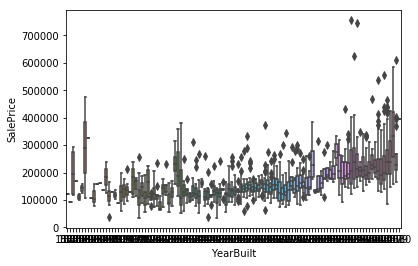

In [20]:
sns.boxplot(Train.YearBuilt, Train.SalePrice );

In [21]:
#В итоге мы можем сделать вывод, что:

#«GrLivArea» и «TotalBsmtSF» кажутся линейно связанными с «SalePrice». Оба отношения являются положительными, 
#что означает, что с увеличением одной переменной увеличивается и другая. В случае TotalBsmtSF мы видим,
#что наклон линейных отношений особенно высок.
#Похоже, что «OverallQual» и «YearBuilt» также связаны с «SalePrice». Взаимосвязь кажется более сильной 
#в случае «OverallQual», где на boxplot показано, как цены продажи увеличиваются с общим качеством.


In [ ]:
# Разделим признаки на категориальные и численные

In [22]:
numerical_features = Train.dtypes[Train.dtypes != "object"].index
categorical_features = Train.dtypes[Train.dtypes == "object"].index

print("У нас: ", len(numerical_features), 'Numerical Features')
print("У нас: ", len(categorical_features), 'Categorical Features')


We have:  38 Numerical Features
We have:  43 Categorical Features


In [23]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [24]:
#Мы видим, что 5 признаков из колличественных переменных - категориальные, исправим это
features_to_transform = ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold','OverallQual']

for feature in features_to_transform:
    Train[feature] = Train[feature].astype("object")

In [27]:
numerical_features = Train.dtypes[Train.dtypes != "object"].index
categorical_features = Train.dtypes[Train.dtypes == "object"].index

print("У нас: ", len(numerical_features), 'Numerical Features')
print("У нас: ", len(categorical_features), 'Categorical Features')


We have:  33 Numerical Features
We have:  48 Categorical Features


# Работа с колличественными признаками

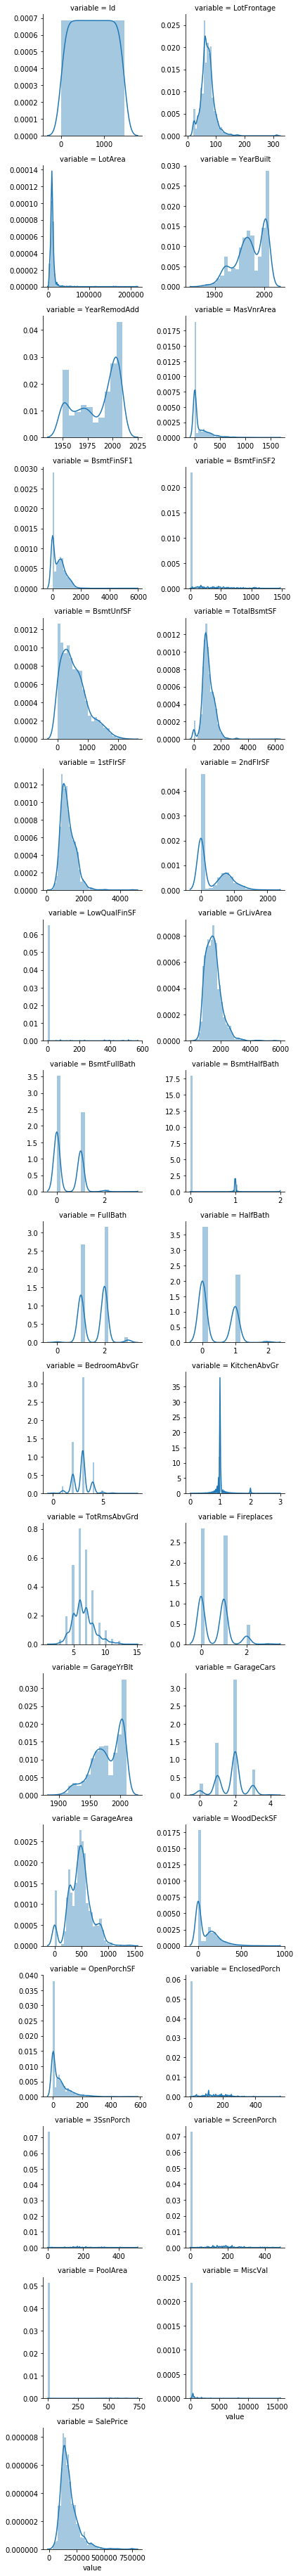

In [28]:
# Посмотрим на распределения численных признаков
f = pd.melt(Train[numerical_features])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

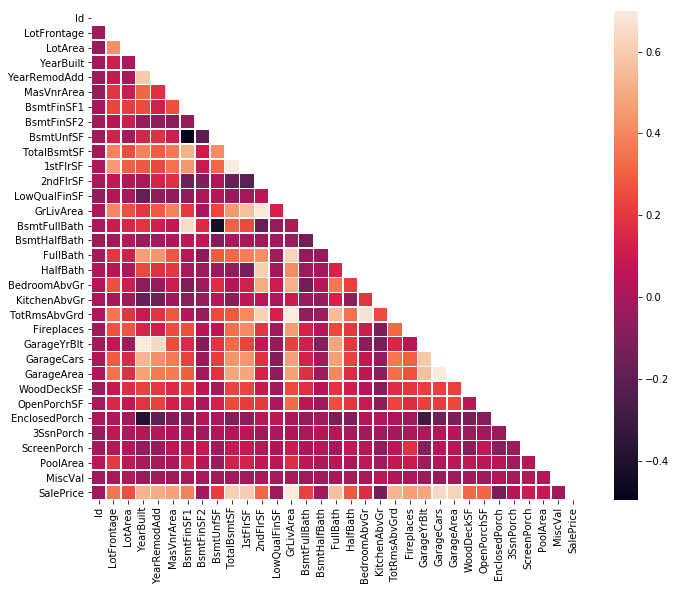

In [29]:
#Посмотрим на корреляцию
corrmat = Train.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, mask=mask, linewidths=.5, vmax=0.7, square=True);

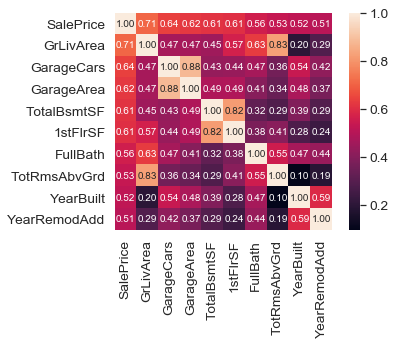

In [30]:
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(Train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [31]:
# Проанализировав корреляционную матрицу и проанализировав признаки избавимся от лишних:

Train.drop(['GarageArea', '1stFlrSF', 'TotRmsAbvGrd','2ndFlrSF', 'PoolArea','MiscVal','EnclosedPorch'],axis=1, inplace=True)


In [32]:
# Посмотрим на связь переменных с помощью pairplot 

C:\Users\roilu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


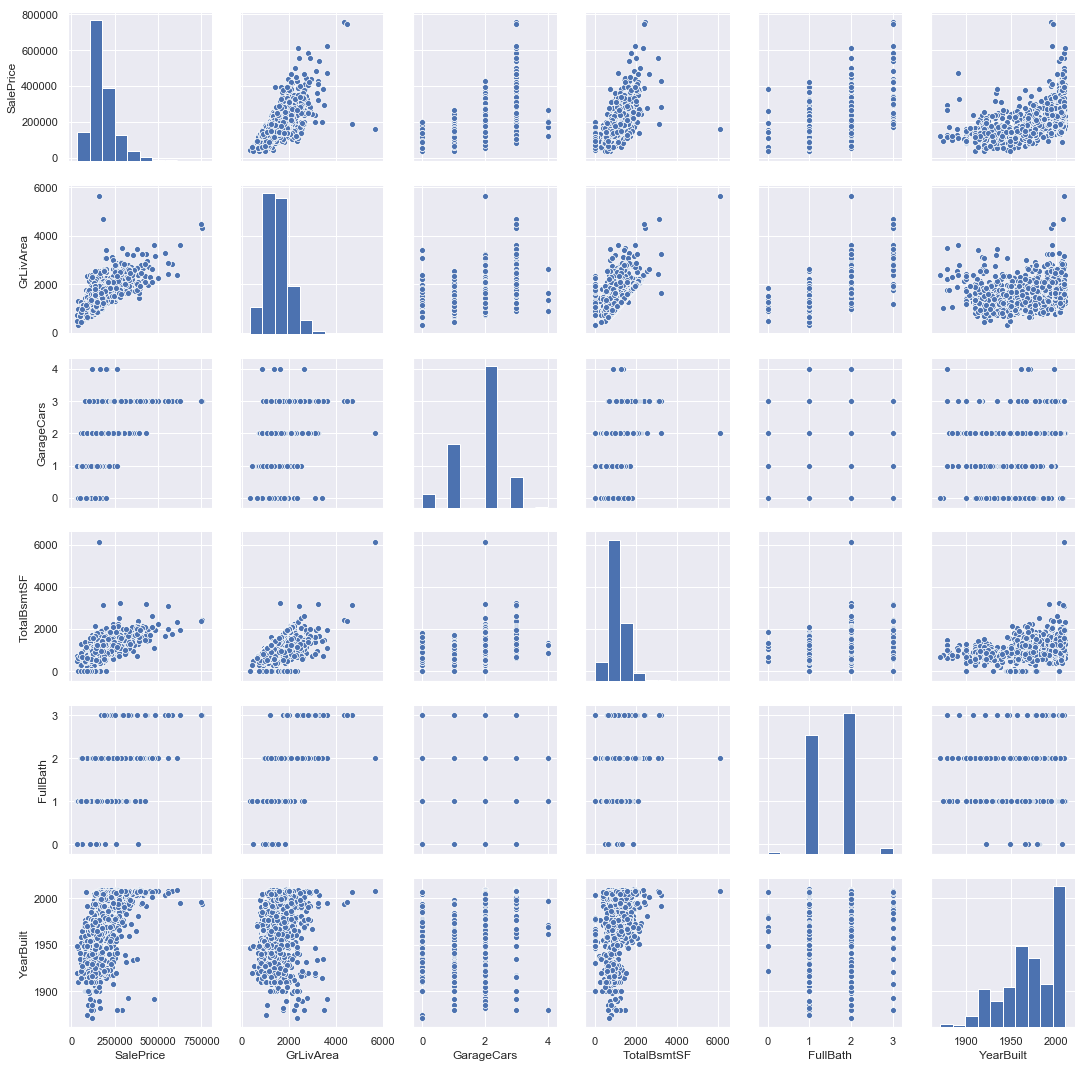

In [33]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(Train[cols], size = 2.5)
plt.show();

## Проверим данные на пропуски  

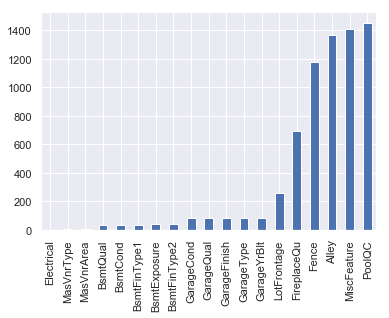

In [34]:
X = Train.isnull().sum()
X = X[X>0]
X.sort_values().plot.bar();

In [35]:
# На мой взгляд при покупке дома такие переменные, как «PoolQC», «MiscFeature», «Alley»,'Fence' не играют большой роли,
#к тому же в данных слишком много пропусков, их мы удаляем
#Поскольку наиболее важная информация о гараже содержится в переменной GarageCars, то мы смело удаляем все Garage переменные
#Та же логика применима к переменным 'BsmtX'.
#Что касается MasVnrArea и MasVnrType, мы можем считать, что эти переменные несущественны. Кроме того, они имеют сильную 
#корреляцию с «YearBuilt» и «GeneralQual», которые уже рассматриваются. Таким образом, мы не потеряем информацию,
#если удалим «MasVnrArea» и «MasVnrType».

In [36]:
X.index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [37]:
Train.drop(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
            'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
            'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],axis=1, inplace=True)

In [38]:
Train = Train.drop(Train.loc[Train['Electrical'].isnull()].index)

In [39]:
# Еще раз посмотрим на самые важные признакми и удалим выбросы

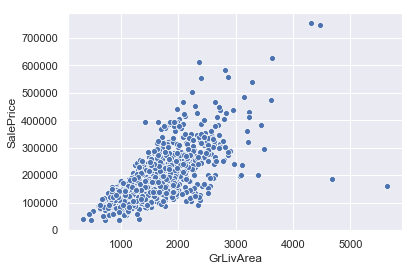

In [40]:
sns.scatterplot(Train.GrLivArea, Train.SalePrice);

In [41]:
Train.sort_values(by = 'GrLivArea', ascending = False)[:2]
Train = Train.drop(Train[Train['Id'] == 1299].index)
Train = Train.drop(Train[Train['Id'] == 524].index)

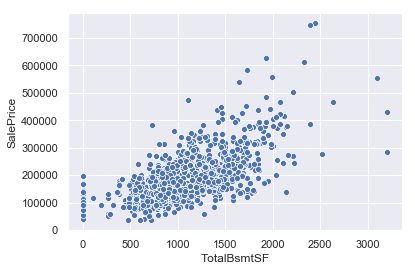

In [42]:
sns.scatterplot(Train.TotalBsmtSF, Train.SalePrice);

In [43]:
# Теперь проверим важные признаки на нормальность, чтобы удовлетворить предпосылки МНК и избавится от гомоскедастичности

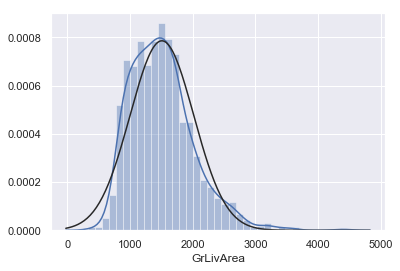

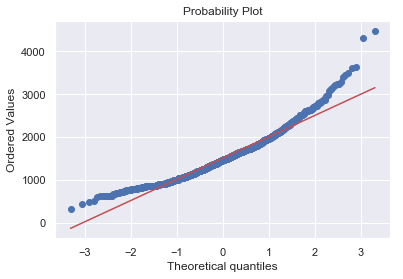

In [44]:
sns.distplot(Train['GrLivArea'], fit=sc.stats.norm);
fig = plt.figure()
res = sc.stats.probplot(Train['GrLivArea'], plot=plt);

In [45]:
Train['GrLivArea'] = np.log(Train['GrLivArea'])

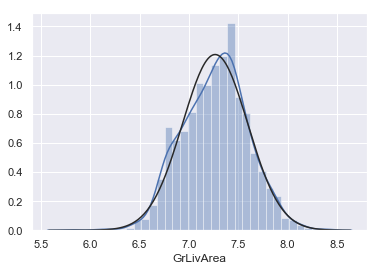

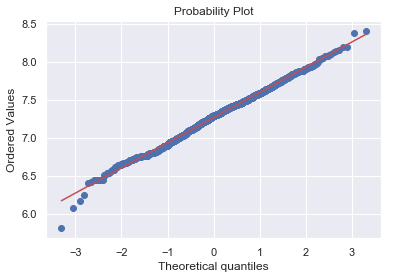

In [46]:
sns.distplot(Train['GrLivArea'], fit=sc.stats.norm);
fig = plt.figure()
res = sc.stats.probplot(Train['GrLivArea'], plot=plt);

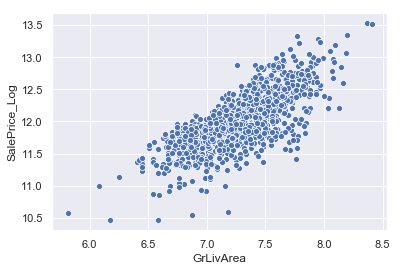

In [47]:
sns.scatterplot(Train.GrLivArea, Y_Log_Train);

# Работа с категориальными признаками

In [48]:
Train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,SBrkr,0,7.444249,1,0,2,1,3,1,Gd,Typ,0,2,Y,0,61,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,SBrkr,0,7.140453,0,1,2,0,3,1,TA,Typ,1,2,Y,298,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,SBrkr,0,7.487734,1,0,2,1,3,1,Gd,Typ,1,2,Y,0,42,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,SBrkr,0,7.448334,1,0,1,0,3,1,Gd,Typ,1,3,Y,0,35,272,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,SBrkr,0,7.695303,1,0,2,1,4,1,Gd,Typ,1,3,Y,192,84,0,0,0,12,2008,WD,Normal,250000


In [49]:
cat_features = Train.dtypes[Train.dtypes=='object'].index

C:\Users\roilu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


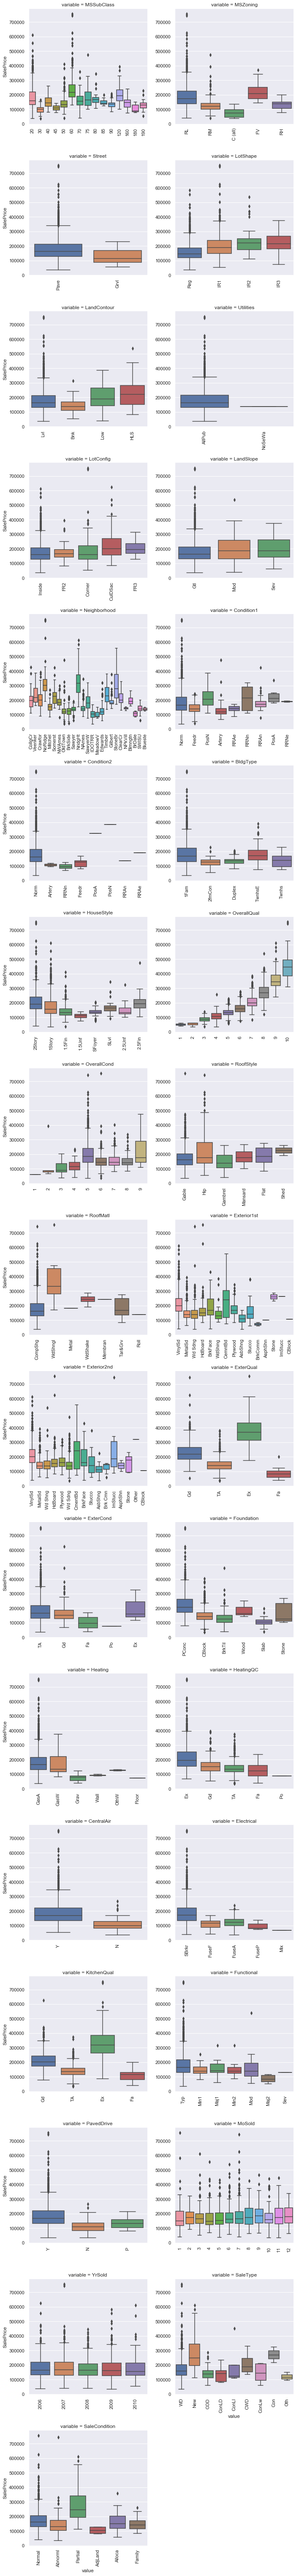

In [50]:
f = pd.melt(Train, id_vars=['SalePrice'], value_vars=Train[cat_features])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

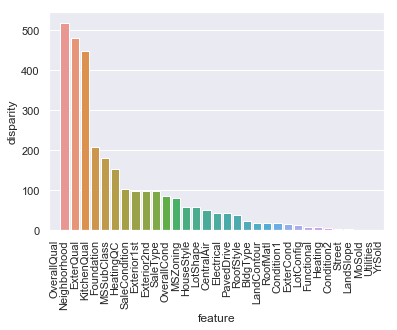

In [51]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = cat_features
    pvals = []
    for c in cat_features:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = sc.stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(Train)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [52]:
delete_cat_features=a['feature'][a.disparity<40]

In [53]:
delete_cat_features

15      RoofStyle
11       BldgType
4     LandContour
16       RoofMatl
9      Condition1
20      ExterCond
6       LotConfig
27     Functional
22        Heating
10     Condition2
2          Street
7       LandSlope
29         MoSold
5       Utilities
30         YrSold
Name: feature, dtype: object

In [54]:
Train.drop(['RoofStyle','BldgType','LandContour','RoofMatl','Condition1','ExterCond','LotConfig',
            'Functional','Heating','Condition2','Street','LandSlope','MoSold','Utilities','YrSold'],axis=1, inplace=True)

# ----------------------------------------------------------------------------------------------




# Строим модели

In [55]:
# Подготовка тестовых данных

In [56]:
Y_Train = Train.copy()['SalePrice']
X_Train = Train.copy().drop(['SalePrice','Id'], axis=1)

In [57]:
Test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [58]:
#Используем в тестовых данных те же признаки что и в трейн редактированных данных

In [59]:
X_Test=Test[X_Train.columns]

In [60]:
X_Test.head()

,MSSubClass,MSZoning,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SaleType,SaleCondition
0,20,RH,11622,Reg,NAmes,1Story,5,6,1961,1961,VinylSd,VinylSd,TA,CBlock,468.0,144.0,270.0,882.0,TA,Y,SBrkr,0,896,0.0,0.0,1,0,2,1,TA,0,1.0,Y,140,0,0,0,120,WD,Normal
1,20,RL,14267,IR1,NAmes,1Story,6,6,1958,1958,Wd Sdng,Wd Sdng,TA,CBlock,923.0,0.0,406.0,1329.0,TA,Y,SBrkr,0,1329,0.0,0.0,1,1,3,1,Gd,0,1.0,Y,393,36,0,0,0,WD,Normal
2,60,RL,13830,IR1,Gilbert,2Story,5,5,1997,1998,VinylSd,VinylSd,TA,PConc,791.0,0.0,137.0,928.0,Gd,Y,SBrkr,0,1629,0.0,0.0,2,1,3,1,TA,1,2.0,Y,212,34,0,0,0,WD,Normal
3,60,RL,9978,IR1,Gilbert,2Story,6,6,1998,1998,VinylSd,VinylSd,TA,PConc,602.0,0.0,324.0,926.0,Ex,Y,SBrkr,0,1604,0.0,0.0,2,1,3,1,Gd,1,2.0,Y,360,36,0,0,0,WD,Normal
4,120,RL,5005,IR1,StoneBr,1Story,8,5,1992,1992,HdBoard,HdBoard,Gd,PConc,263.0,0.0,1017.0,1280.0,Ex,Y,SBrkr,0,1280,0.0,0.0,2,0,2,1,Gd,0,2.0,Y,0,82,0,0,144,WD,Normal


In [61]:
X_Train.head()

,MSSubClass,MSZoning,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SaleType,SaleCondition
0,60,RL,8450,Reg,CollgCr,2Story,7,5,2003,2003,VinylSd,VinylSd,Gd,PConc,706,0,150,856,Ex,Y,SBrkr,0,7.444249,1,0,2,1,3,1,Gd,0,2,Y,0,61,0,0,0,WD,Normal
1,20,RL,9600,Reg,Veenker,1Story,6,8,1976,1976,MetalSd,MetalSd,TA,CBlock,978,0,284,1262,Ex,Y,SBrkr,0,7.140453,0,1,2,0,3,1,TA,1,2,Y,298,0,0,0,0,WD,Normal
2,60,RL,11250,IR1,CollgCr,2Story,7,5,2001,2002,VinylSd,VinylSd,Gd,PConc,486,0,434,920,Ex,Y,SBrkr,0,7.487734,1,0,2,1,3,1,Gd,1,2,Y,0,42,0,0,0,WD,Normal
3,70,RL,9550,IR1,Crawfor,2Story,7,5,1915,1970,Wd Sdng,Wd Shng,TA,BrkTil,216,0,540,756,Gd,Y,SBrkr,0,7.448334,1,0,1,0,3,1,Gd,1,3,Y,0,35,272,0,0,WD,Abnorml
4,60,RL,14260,IR1,NoRidge,2Story,8,5,2000,2000,VinylSd,VinylSd,Gd,PConc,655,0,490,1145,Ex,Y,SBrkr,0,7.695303,1,0,2,1,4,1,Gd,1,3,Y,192,84,0,0,0,WD,Normal


In [62]:
#Применяем те же преобразования к тестовому набору что и к тренировочному

In [63]:
X_Test['GrLivArea'] = np.log(X_Test['GrLivArea'])

In [64]:
features_to_transform = ['MSSubClass', 'OverallCond','OverallQual']

for feature in features_to_transform:
    X_Test[feature] = X_Test[feature].astype("object")
    

In [65]:
X_Train=pd.get_dummies(X_Train)
X_Test=pd.get_dummies(X_Test)
Y_Log_Train = np.log(Y_Train)

In [66]:
col = ['Exterior1st_Stone', 'Exterior2nd_Other', 'Electrical_Mix', 'Exterior1st_ImStucc', 'HouseStyle_2.5Fin']
for i in col:
    X_Test[i]=0  

In [67]:
# Тестовые данные готовы к прогнозу финальной моделью(и в трейне и в тесте одинаковое колличество признаков)
X_Test=X_Test[X_Train.columns]

In [68]:
#Замерим качество модели на тренировочном наборе, первый бейс лайн
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

scores_R2 = []
scores_MSE = []

for state in tqdm_notebook(range(30), leave=False):
    X_train, X_test, y_train, y_test = train_test_split(X_Train, Y_Log_Train, test_size=0.33, random_state=state*11)
    model = xgb.XGBRegressor(objective ='reg:squarederror',max_depth=5, colsample_bylevel=0.8, colsample_bytree=0.8, n_jobs=-1)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    scores_R2.append(r2(y_test, preds))
    scores_MSE.append(mse(y_test, preds))


In [69]:
print(f'R2 is {round(np.mean(scores_R2), 4)}')   
print(f'MSE is {round(np.mean(scores_MSE), 4)}')

R2 is 0.8917
MSE is 0.0172


In [70]:
#Подбор параметров модели

In [72]:
from sklearn.model_selection import RandomizedSearchCV
model=xgb.XGBRegressor()
hyperparameters = {
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'n_estimators': [100]}

clf = RandomizedSearchCV(model, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

best_model = clf.fit(X_Train, Y_Log_Train)


C:\Users\roilu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


[21:51:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [74]:
best_model.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1.0,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
#Создадим функцию для сохранения сабмишина
def make_submission(ids, predictions, name):
    pd.DataFrame(data={'Id':ids, 'SalePrice': predictions}).to_csv('../Data/submission/'+name, index=False)

In [ ]:
preds_log = best_model.predict(X_Test)

In [ ]:
#Преобразуем логарифмы предсказаний в первоначальные единицы измерения

def log_back(list_):
#вычисляет значение натурального логарифма
    new_list=[]
    for i in list_:
        new_list.append(np.e**i)
    return new_list

preds=log_back(preds_log)

In [ ]:
make_submission(Test.Id, preds, 'XGB_best_model.csv')